In [15]:
%matplotlib inline
from __future__ import division
import math; import numpy as np
import matplotlib as mpl; import matplotlib.pyplot as plt
import reach_tests as tests; from classes import *

# Problem Set - Reachability

In this mini pset, you will implement functions to compute reachability to help a flying plane navigate through forest of trees.  First you'll learn about the data structures used by the algorithm, then you'll implement some helper functions, and finally you'll combine them to identify all possible collisions as a plane flies through the forest.

Throughout the pset, we provide a visualization of reachable states and obstacles that may occupy them. Blue means state, green means obstacle, and red means a collision of state with obstacle. Below is a map of the area at t=0: There are three trees, and you are initially located at 2,2. Obstacles and states that appear outside the boundaries are not displayed, but your algorithms should still handle them. 




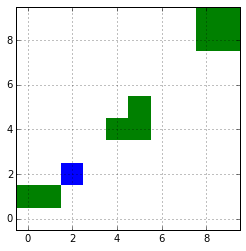

In [16]:
tests.draw_init_map()

To begin, we'll introduce the provided data structures. Please read and run the examples below, making sure that you understand the code and that there are no errors.

There are two main classes to work with: states and obstacles. States have a location x,y (accessible via state.x and state.y), and obstacles have a name and a list of states they occupy (obstacle.name, obstacle.states).

In [17]:
# A get-to-know-me state
my_state = state(1,2)
print my_state
print my_state.x
print my_state.y

S(1,2)
1
2


In [18]:
# A get-to-know-me obstacle
my_ob = obstacle("tree",[state(1,1),state(1,2)])
print my_ob
print my_ob.name
print my_ob.states

tree([S(1,1), S(1,2)])
tree
[S(1,1), S(1,2)]


## Reachability Function

Your first task is to write the reachable function. Given some start state, return a list of possible states to be in after one time step.

The plane has the ability to move 1-3 spaces forward, 1 left or right, or 1 back. It may not remain in the same location without stalling and falling. 

<br/>
<div class="alert alert-info">
Please implement the following function.
</div>

In [19]:
def reachable(start_state):
    x=start_state.x
    y=start_state.y
    reachable = [state(x,y+1),state(x,y+2),state(x,y+3),state(x+1,y),state(x-1,y),state(x,y-1)]
    return reachable
    # raise NotImplementedException("Whoops, forgot to implement this!")

Now, let's visualize this:

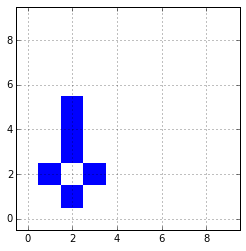

In [20]:
tests.graph_states(reachable(state(2,2)))

## Reachable States after Several Timesteps

Next, find all the reachable states after *steps* timesteps. As we talked about in the lecture, these are all of the possible states the plane could have reached by the end of *steps* timesteps. Given a list of states and an integer representing number of steps, return a list of states reachable after that many timesteps.

<br/>
<div class="alert alert-info">
Please implement the following function.
</div>

In [21]:
def get_reachable_by_step(states,steps):
    states = states
    for step in range(steps):
        for state in states:
            states = list(set(states + reachable(state)))
    return states
    # raise NotImplementedException("Whoops, forgot to implement this!")

Let's see if it passes the tests:

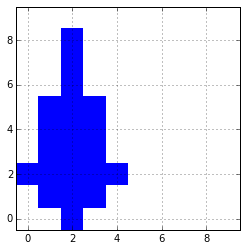

Tests passed!!

In [22]:
tests.graph_states(get_reachable_by_step([state(2,2)],2))
tests.test_get_reachable(get_reachable_by_step)
tests.test_ok()

## Reachset after Several Timesteps

Next, compute the reach set after *steps* timesteps. The reach set is the set of states the plane can occupy after *steps* timesteps. This is distinct from reachable: a reach set is a subset of reachable states. Given a list of states and an integer number of steps, return a list of states which are the reach set after that many timesteps.

<br/>
<div class="alert alert-info">
Please implement the following function.
</div>

In [23]:
def get_reach_by_step(states,steps):
    old_states = states
    for step in range(steps):
        new_states =[]
        for state in old_states:
            for new_state in reachable(state):
                new_states = list(set(new_states + reachable(state)))
        old_states = new_states
    return new_states
    # raise NotImplementedException("Whoops, forgot to implement this!")

Now let's test:

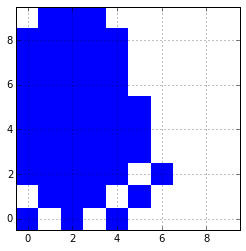

Tests passed!!

In [24]:
tests.graph_states(get_reach_by_step([state(2,2)],4))
tests.test_get_reach(get_reach_by_step)
tests.test_ok()

## Avoiding Obstacles

In order to see if everything in our reach set is valid, we must avoid obstacles. Create a list of obstacles to match the map from the beginning of the pset. 

In [25]:
ob1 = obstacle("tree1",[state(9,9),state(9,8),state(8,8),state(8,9)])
ob2 = obstacle("tree2",[state(1,0),state(1,1)])
ob3 = obstacle("tree3",[state(4,4),state(4,5),state(5,5)])

obstacles = [ob1,ob2,ob3]

Finally, get the intersection of obstacles and a list of states we generate from our reach set. Given a list of states and a list of obstacles, return a list of states that are both in that set of states and also occupied by an obstacle.

In [26]:
def get_intersection(states,obstacles):
    intersection = []
    for state1 in states:
        for obstacle in obstacles:
            if state1 in obstacle.states:
                intersection.append(state)
                break
    return intersection

Let's test:

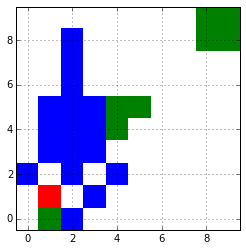

Exception: Does not pass test!

In [27]:
states = get_reach_by_step([state(2,2)],2)
tests.graph_state_interesections(get_intersection,states,obstacles)
tests.test_intersection(get_intersection,get_reach_by_step([state(0,0)],1))
tests.test_ok()

All done!